# Project 2: Mini deep-learning framework

https://fleuret.org/ee559/ee559-miniprojects.pdf
    
https://www.overleaf.com/8773141819qyxryzqggdnn

In [89]:
from torch import tensor,set_grad_enabled,empty,float32,ones
set_grad_enabled(False);
import matplotlib.pyplot as plt

In [5]:
t=tensor([-1,1])
t.rel

tensor([1, 1])

In [129]:
class myLayer:
    def __init__(self,activation,shape,bias):
        self.weights=self._init_weights(shape)
        self.bias=self._init_bias(bias,shape[0])
        self._thr_func=activation
        
    def bckwrd(self,prev_delta,prev_act):
        resp=(self.weights*prev_delta+self.bias.view(-1)).sum(1)
        return self._der_thr(prev_act)*resp

    def frwrd(self,prev_input):
        return self._thr((self.weights*prev_input+self.bias.view(-1)).sum(1))
    
    def updt_weights(self,err,act,gamma):
        print(self.weights)
        self.weights=self.weights-gamma*err*act
        print(self.weights)
    def _init_weights(self,sz):
        return ones((sz[0],sz[1]),dtype=float32)
    def _init_bias(self,bias_val,sz):
        return bias_val*ones((sz,1),dtype=float32)
    def _thr(self,tens):
        if self._thr_func=="relu":
            return tens*(tens>0).float()
        elif self._thr_func=="tanh":
            return tens.tanh()
    def _der_thr(self,tens):
        if self._thr_func=="relu":
            return 1*(tens>0).float()
        elif self._thr_func=="tanh":
            return 1-(tens.tanh())^2

class myNetwork:
    def __init__(self):
        self.layers=[]
        self.weights=[]
        self.lr=0.001
    def add_layer(self,activation,shape,bias_val):
        self.layers.append(myLayer(activation,shape,bias_val))
        
    def weights_as_image(self):
        for lay in self.layers:
            plt.imshow(lay.weights)
    def weights_values(self):
        print("\n**************")
        for lay in self.layers:
            print(lay.weights)
            
    def forward(self,x):
        prev_input=x
        activities=[]
        for lay in self.layers:
            prev_input=lay.frwrd(prev_input)
            activities.append(prev_input)
        return activities
    def err(self,y,yhat,kind="rms"):
        if kind=="rms":
            return (y**2-yhat**2).sum()
    def backward(self,err,activities):
        delta_lay=err
        for lay,act in zip(reversed(self.layers),reversed(activities)):
            lay.updt_weights(delta_lay,act,self.lr)
            delta_lay=lay.bckwrd(delta_lay,act)
        return delta_lay
    


                          

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.5280, 1.5280, 1.5280],
        [1.5280, 1.5280, 1.5280],
        [1.5280, 1.5280, 1.5280]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1.8068, 1.8068, 1.8068],
        [1.8068, 1.8068, 1.8068],
        [1.8068, 1.8068, 1.8068]])
-803.15771484375
tensor([[1.5280, 1.5280, 1.5280],
        [1.5280, 1.5280, 1.5280],
        [1.5280, 1.5280, 1.5280]])
tensor([[14.8320, 14.8320, 14.8320],
        [14.8320, 14.8320, 14.8320],
        [14.8320, 14.8320, 14.8320]])
tensor([[1.8068, 1.8068, 1.8068],
        [1.8068, 1.8068, 1.8068],
        [1.8068, 1.8068, 1.8068]])
tensor([[130.9459, 130.9459, 130.9459],
        [130.9459, 130.9459, 130.9459],
        [130.9459, 130.9459, 130.9459]])
-407385792.0
tensor([[14.8320, 14.8320, 14.8320],
        [14.8320, 14.8320, 14.8320],
        [14.8320, 14.8320, 14.8320]])
tensor([[4.7473e+09, 4.7473e+09, 4.7473e+09],
        [4.7473e+09, 4.7473e+09, 

/home/paul/python/miniconda3/envs/dl/lib/python3.7/site-packages/matplotlib/image.py:395: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/home/paul/python/miniconda3/envs/dl/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/paul/python/miniconda3/envs/dl/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/paul/python/miniconda3/envs/dl/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/paul/python/miniconda3/envs/dl/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/paul/python/miniconda3/envs/dl/lib/python3.7/site-packages/numpy/ma/core.py:718: UserWarning

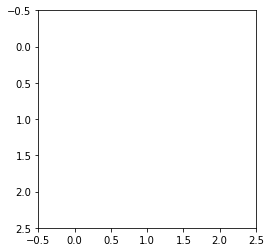

In [128]:
nw=myNetwork()
nw.add_layer('relu',(3,3),0)
nw.add_layer('relu',(3,3),0)

x=tensor([1,2,-1],dtype=float32)
y=tensor([2,4,0],dtype=float32)
act=nw.forward(x)
err=nw.err(y,act[-1])
nw.backward(err,act)
err_lst=[]
for i in range(5):
    act=nw.forward(x)
    err=nw.err(y,act[-1])
    print(err.item())
    err_lst.append(err.item())
    nw.backward(err,act)
nw.weights_as_image()
#plt.plot(err_lst)
nw.weights_values()

In [114]:
test=myNetwork()
test.add_layer('tanh',(2,25),1)
test.add_layer('tanh',(25,25),1)
test.add_layer('tanh',(25,25),1)
test.add_layer('tanh',(25,25),1)
test.add_layer('relu',(25,2),1)
x=tensor([1,2],dtype=float32)
y=tensor([1,5],dtype=float32)
test.forward(x)

TypeError: forward() missing 1 required positional argument: 'y'